# BA820 Project Proposal: Exploratory Data Analysis

**Course:** BA820 - Unsupervised and Unstructured Machine Learning  
 **Authors:** Aryan Jain, Ansh Gupta, Quency Ye, Yashaswini Reddy

**GitHub Repository:** [Add your repo link]

---

## Executive Summary

This notebook demonstrates **question-driven exploratory data analysis** for two TidyTuesday datasets. Our analysis prioritizes:

-  **Domain understanding** before algorithmic selection
-  **Pattern discovery** that motivates research questions  
-  **Insight generation** focused on decision-making value
-  **Feasibility assessment** for unsupervised methods
  

**Philosophy:** Unsupervised learning methods should be motivated by genuine insights, not algorithmic convenience.

##  Table of Contents

### Part I: Childcare Costs Dataset (Primary)
1. Dataset Overview & Research Motivation
2. Data Loading & Structure
3. Temporal Patterns → *Supports Trajectory Clustering Question*
4. Geographic Heterogeneity → *Supports Market Archetype Question*
5. Affordability Paradox → *Supports Burden-Based Clustering Question*
6. Multivariate Relationships → *Supports Dimensionality Reduction*
7. Summary: Research Questions Validated

### Part II: Programming Languages Dataset (Backup)
8. Dataset Overview & Research Motivation
9. Data Loading & Ecosystem Patterns
10. Language Combinations → *Supports Architecture Clustering Question*
11. Summary: Research Questions Validated

### Part III: Synthesis
12. Key Findings Across Both Datasets
13. Proposed Unsupervised Learning Directions
14. Conclusion

**Note:** Each analysis directly supports a specific research question from our proposal.

---
# PART I: CHILDCARE COSTS DATASET

## 1. Dataset Overview & Research Motivation

###  Dataset: National Database of Childcare Prices

**Source:** U.S. Department of Labor Women's Bureau (via TidyTuesday)  
**URL:** https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-05-09

| Characteristic | Details |
|---------------|---------|
| **Observations** | 34,567 county-year combinations |
| **Variables** | 61 features (costs, income, labor, demographics, households) |
| **Temporal** | 2008-2018 (Great Recession → Recovery) |
| **Geographic** | U.S. counties (FIPS coded) |

### Why This Dataset?
**1. Meaningful, Data-Driven Problem:**
- Childcare costs consume 10-20% of household income, creating workforce barriers
- Policy-relevant: Informs subsidy programs and economic development

**2. Enables Insightful Business/Domain Questions:**
- Do counties cluster by cost-affordability-participation *relationships* (not just absolute values)?
- Can we identify trajectory groups showing different recession responses?
- Are there "childcare deserts" with anomalous cost-context patterns?

**3. Suitable for Unsupervised Learning:**
- High dimensionality (61 variables) → dimensionality reduction
- Temporal structure → trajectory clustering
- Complex correlations → natural groupings likely exist
- No obvious labels → unsupervised methods appropriate

**4. Stakeholder Impact:**
- Policymakers: Design targeted interventions
- Employers: Evaluate family benefit programs
- Urban planners: Address infrastructure gaps

### 🔍 Key Variables

**Costs:** `mcsa` (school-age), `mc_infant`, `mc_toddler`, `mc_preschool`  
**Economic:** `mhi_2018` (income), `unr_20to64` (unemployment)  
**Labor:** `flfpr_20to64` (female participation), `h_under6_both_work` (dual-income families)  
**Demographics:** Racial composition, household structures

In [ ]:
# Install packages (Colab only)
!pip install -q seaborn>=0.12.0 scikit-learn>=1.2.0

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

print(" Setup complete - libraries imported and configured")

 Setup complete - libraries imported and configured


In [ ]:
# Load Childcare Costs dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-05-09/childcare_costs.csv"
df_childcare = pd.read_csv(url)

# Quick data overview
print("=" * 80)
print("CHILDCARE COSTS DATASET - STRUCTURE")
print("=" * 80)
print(f"Shape: {df_childcare.shape[0]:,} rows × {df_childcare.shape[1]} columns")
print(f"Time range: {df_childcare['study_year'].min()}-{df_childcare['study_year'].max()}")
print(f"Counties: {df_childcare['county_fips_code'].nunique():,}")
print(f"Missing values: {df_childcare.isnull().sum().sum():,} total")
print(f"\nKey variables present: mcsa ✓, mhi_2018 ✓, flfpr_20to64 ✓")

# Display sample
print("\n Sample Data (first 3 rows):")
df_childcare[['study_year', 'county_fips_code', 'mcsa', 'mhi_2018', 'flfpr_20to64']].head(3)

CHILDCARE COSTS DATASET - STRUCTURE
Shape: 34,567 rows × 61 columns
Time range: 2008-2018
Counties: 3,144
Missing values: 88,636 total

Key variables present: mcsa ✓, mhi_2018 ✓, flfpr_20to64 ✓

 Sample Data (first 3 rows):


,study_year,county_fips_code,mcsa,mhi_2018,flfpr_20to64
0,2008,1001,80.92,58462.55,68.9
1,2009,1001,83.42,60211.71,70.8
2,2010,1001,85.92,61775.80,71.3


## 2. Temporal Patterns → Trajectory Clustering Question

**Research Question (from Proposal):**  
*"Can we identify distinct groups of counties that experienced fundamentally different childcare cost dynamics from 2008-2018?"*

**Why This Analysis Matters:**
- Understanding trajectory types helps predict which counties face accelerating crises
- Different trajectories may require different policy interventions
- **Surprising outcome to look for:** Counties with similar 2008 costs diverging dramatically by 2018

TEMPORAL TRENDS: 2008-2018
            count    mean  median    std
study_year                              
2008         1424   89.70   85.10  30.30
2009         1901   91.84   87.00  29.78
2010         1991   92.01   87.17  31.11
2011         1992   94.35   88.34  32.56
2012         2053   97.20   90.50  33.01
2013         2074  101.58   97.82  33.08
2014         2323  103.95   99.09  34.05
2015         2398  107.24  100.00  36.27
2016         2641  105.40  100.00  32.92
2017         2436  107.56  102.27  34.49
2018         2360  112.59  106.22  40.26

📈 Average annual growth: 2.31%
   Range: -1.72% to 4.68%
   During recession (2009): 2.39%


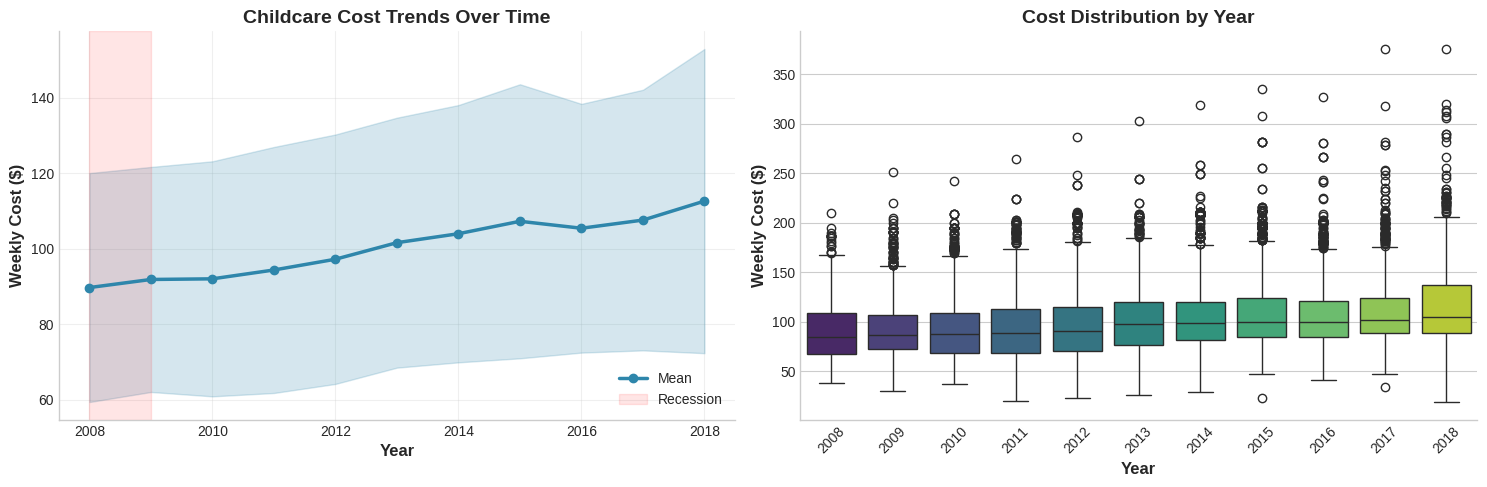

In [ ]:
# Temporal analysis
temporal_stats = df_childcare.groupby('study_year')['mcsa'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)

print("=" * 80)
print("TEMPORAL TRENDS: 2008-2018")
print("=" * 80)
print(temporal_stats)

# Year-over-year growth
yearly_change = temporal_stats['mean'].pct_change() * 100
print(f"\n📈 Average annual growth: {yearly_change.mean():.2f}%")
print(f"   Range: {yearly_change.min():.2f}% to {yearly_change.max():.2f}%")
print(f"   During recession (2009): {yearly_change.loc[2009]:.2f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Trend with uncertainty
axes[0].plot(temporal_stats.index, temporal_stats['mean'],
            marker='o', linewidth=2.5, color='#2E86AB', label='Mean')
axes[0].fill_between(temporal_stats.index,
                    temporal_stats['mean'] - temporal_stats['std'],
                    temporal_stats['mean'] + temporal_stats['std'],
                    alpha=0.2, color='#2E86AB')
axes[0].axvspan(2008, 2009, alpha=0.1, color='red', label='Recession')
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Weekly Cost ($)', fontweight='bold')
axes[0].set_title('Childcare Cost Trends Over Time', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribution by year
df_sample = df_childcare[df_childcare['mcsa'].notna()].groupby('study_year', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), 2000), random_state=42)
)
sns.boxplot(data=df_sample, x='study_year', y='mcsa', ax=axes[1], palette='viridis')
axes[1].set_xlabel('Year', fontweight='bold')
axes[1].set_ylabel('Weekly Cost ($)', fontweight='bold')
axes[1].set_title('Cost Distribution by Year', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


From the childcare cost trends, we find that the mean weekly cost increase steadily from 2008 to 2018. There is no sharp break during the recession period as the costs continue rising. Based on these, childcare costs did not fall even during recession, and the widening band implies that counties are not moving on the same pace which means some counties esperienced much faster cost growth while others slower.

From the boxplots, we can see that The median cost increases almost every year. The upper tail outlines become more extreme after 2013. The boxplots show that high-cost counties pulled away faster, creating more extreme high prices, while lower-cost counties increased more slowly. This means the difference between counties became larger over time.

## 3. Geographic Heterogeneity → Market Archetype Question

**Research Question (from Proposal):**  
*"Do distinct 'childcare market archetypes' exist where counties cluster by RELATIONSHIPS between cost, affordability, and labor participation (not absolute values)?"*

**Why This Analysis Matters:**
- High geographic variation suggests natural groupings exist
- Understanding archetypes enables targeted policy design
- **Surprising outcome to look for:** Counties grouping by dynamics rather than geography

GEOGRAPHIC HETEROGENEITY
Counties analyzed: 3,144
Cost range: $18.98 - $313.96
Ratio (high/low): 16.54x
Coefficient of variation: 0.335

→ High CV indicates SUBSTANTIAL heterogeneity - clustering opportunity!


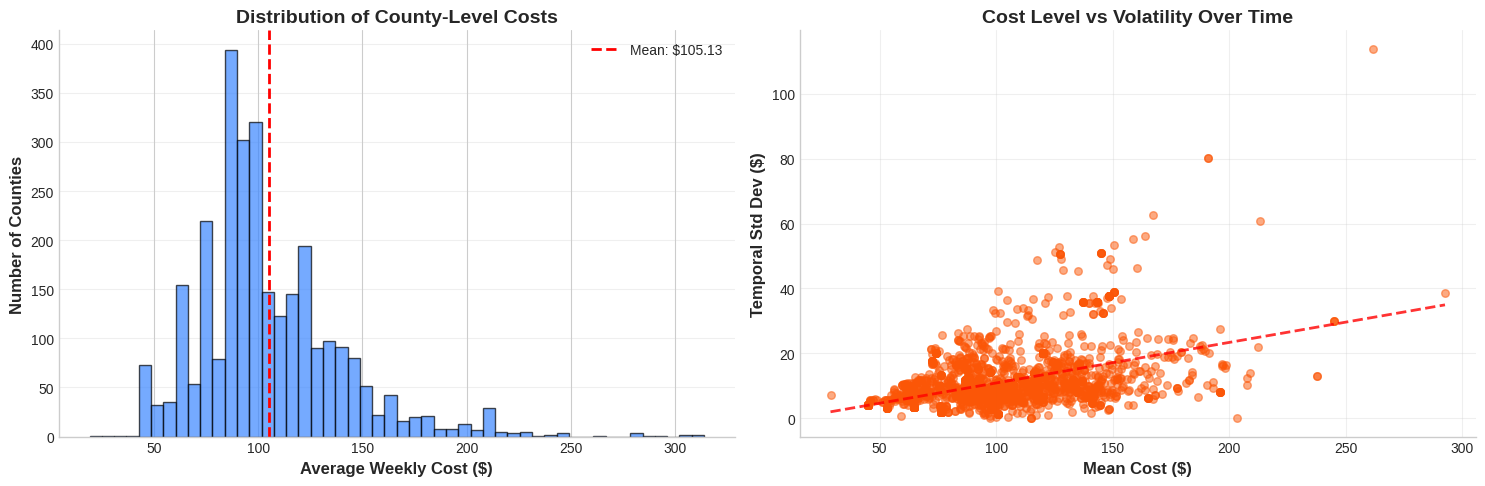

In [ ]:
# Geographic variation analysis
county_stats = df_childcare.groupby('county_fips_code')['mcsa'].agg([
    'count', 'mean', 'std'
]).round(2)

print("=" * 80)
print("GEOGRAPHIC HETEROGENEITY")
print("=" * 80)
print(f"Counties analyzed: {len(county_stats):,}")
print(f"Cost range: ${county_stats['mean'].min():.2f} - ${county_stats['mean'].max():.2f}")
print(f"Ratio (high/low): {county_stats['mean'].max() / county_stats['mean'].min():.2f}x")
print(f"Coefficient of variation: {county_stats['mean'].std() / county_stats['mean'].mean():.3f}")
print(f"\n→ High CV indicates SUBSTANTIAL heterogeneity - clustering opportunity!")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution
axes[0].hist(county_stats['mean'], bins=50, edgecolor='black', alpha=0.7, color='#3A86FF')
axes[0].axvline(county_stats['mean'].mean(), color='red', linestyle='--',
               linewidth=2, label=f"Mean: ${county_stats['mean'].mean():.2f}")
axes[0].set_xlabel('Average Weekly Cost ($)', fontweight='bold')
axes[0].set_ylabel('Number of Counties', fontweight='bold')
axes[0].set_title('Distribution of County-Level Costs', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Mean vs volatility - FIXED
# Remove NaN values from BOTH arrays together
county_clean = county_stats[['mean', 'std']].dropna()
axes[1].scatter(county_clean['mean'], county_clean['std'], alpha=0.5, s=30, color='#FB5607')

# Fit regression line
z = np.polyfit(county_clean['mean'], county_clean['std'], 1)
p = np.poly1d(z)
x_line = np.linspace(county_clean['mean'].min(), county_clean['mean'].max(), 100)
axes[1].plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8)

axes[1].set_xlabel('Mean Cost ($)', fontweight='bold')
axes[1].set_ylabel('Temporal Std Dev ($)', fontweight='bold')
axes[1].set_title('Cost Level vs Volatility Over Time', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


From the distribution of county-level costs, most of the counties cost around 80 to 130 dollar per week, but there are many counties far above that, stretching past 200 to 300 dollar per week. For the scatter plot, we found that Higher childcare costs often come with more instability, but not always. For instance, two counties might both cost aroung 80 - 120 dollar per week, but one has stable prices, other one has wild sings over time. Put them together, two counties can charge the same price for childcare, but feel completely different to families, and that difference is exactly what defines a childcare market.

## 4. Affordability Paradox → Burden-Based Clustering

**Research Question (from Proposal):**  
*"Can we detect 'childcare deserts' through anomalous cost-context patterns, where burden relative to income reveals different market dynamics?"*

**Why This Analysis Matters:**
- Absolute costs don't tell the full story - relative burden matters
- Understanding cost-income relationships reveals equity issues
- **Surprising outcome to look for:** High-income counties with low participation despite "affordable" costs

AFFORDABILITY ANALYSIS
Mean burden: 10.65%
Median burden: 10.50%
Exceeding 10% threshold: 56.0%


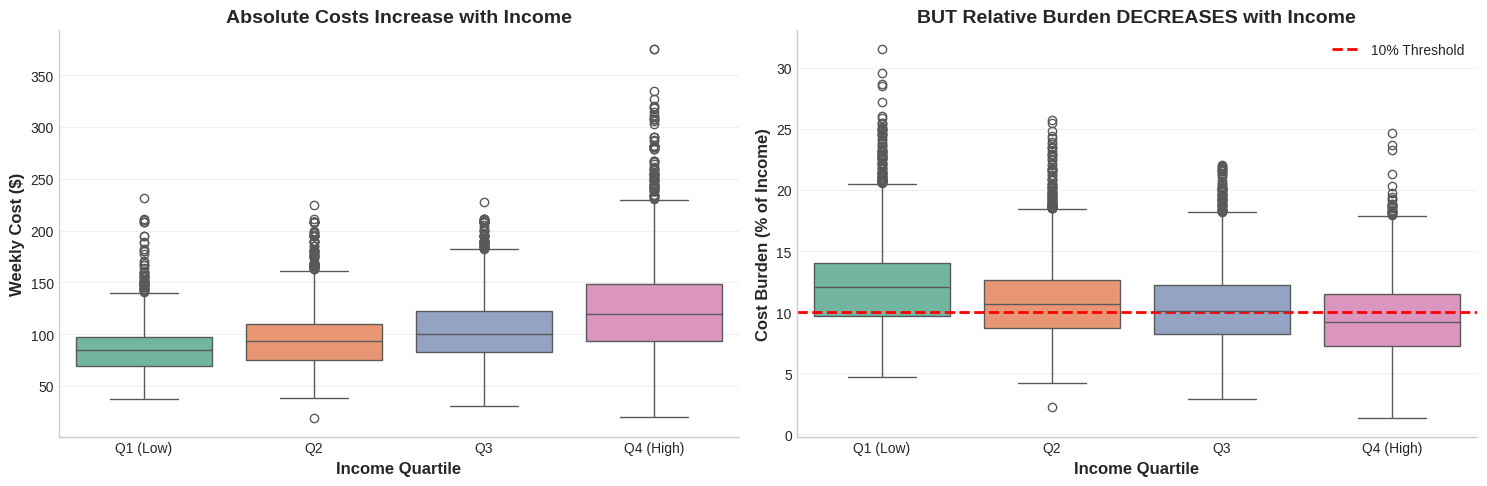

In [ ]:
# Affordability analysis
df_afford = df_childcare[
    df_childcare['mcsa'].notna() &
    df_childcare['mhi_2018'].notna()
].copy()

df_afford['weekly_income'] = df_afford['mhi_2018'] / 52
df_afford['cost_burden_pct'] = (df_afford['mcsa'] / df_afford['weekly_income']) * 100
df_afford = df_afford[df_afford['cost_burden_pct'] <= 50]  # Remove outliers

print("=" * 80)
print("AFFORDABILITY ANALYSIS")
print("=" * 80)
print(f"Mean burden: {df_afford['cost_burden_pct'].mean():.2f}%")
print(f"Median burden: {df_afford['cost_burden_pct'].median():.2f}%")
print(f"Exceeding 10% threshold: {(df_afford['cost_burden_pct'] > 10).mean()*100:.1f}%")

# Income quartile analysis
df_afford['income_quartile'] = pd.qcut(df_afford['mhi_2018'], q=4,
                                       labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

# Visualize THE PARADOX
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Absolute costs by income
sns.boxplot(data=df_afford, x='income_quartile', y='mcsa', ax=axes[0], palette='Set2')
axes[0].set_xlabel('Income Quartile', fontweight='bold')
axes[0].set_ylabel('Weekly Cost ($)', fontweight='bold')
axes[0].set_title('Absolute Costs Increase with Income', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# RELATIVE burden by income
sns.boxplot(data=df_afford, x='income_quartile', y='cost_burden_pct', ax=axes[1], palette='Set2')
axes[1].axhline(10, color='red', linestyle='--', linewidth=2, label='10% Threshold')
axes[1].set_xlabel('Income Quartile', fontweight='bold')
axes[1].set_ylabel('Cost Burden (% of Income)', fontweight='bold')
axes[1].set_title('BUT Relative Burden DECREASES with Income', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


From the first income quartile, we can see that as income go up, the costs go up.High income counties pay more per week for childcare, while low income counties pay less in absolute terms. For the second income quartile, we found that low income counties spend a large share of income on childcare. As income rises, childcare takes up a smaller percenage of household income. The red 10% line shows an benchmark, many low-income conties are above it, and higer income counties are mostly below it. Those give us a picture that some places look affordable but still function like childcare deserts because the burden on families is too high.  

## 5. Multivariate Relationships → Dimensionality Reduction

**Analysis Goal:**  
Understand correlation structure and assess whether dimensionality reduction can reveal latent factors driving childcare markets.


CORRELATION STRUCTURE
               mcsa  mhi_2018  flfpr_20to64  unr_20to64
mcsa          1.000     0.499         0.263      -0.082
mhi_2018      0.499     1.000         0.528      -0.407
flfpr_20to64  0.263     0.528         1.000      -0.420
unr_20to64   -0.082    -0.407        -0.420       1.000

 PCA DIMENSIONALITY REDUCTION:
   Original features: 59
   Components for 90% variance: 16
   Reduction: 72.9%

   PC1: 26.2% | PC2: 16.2%


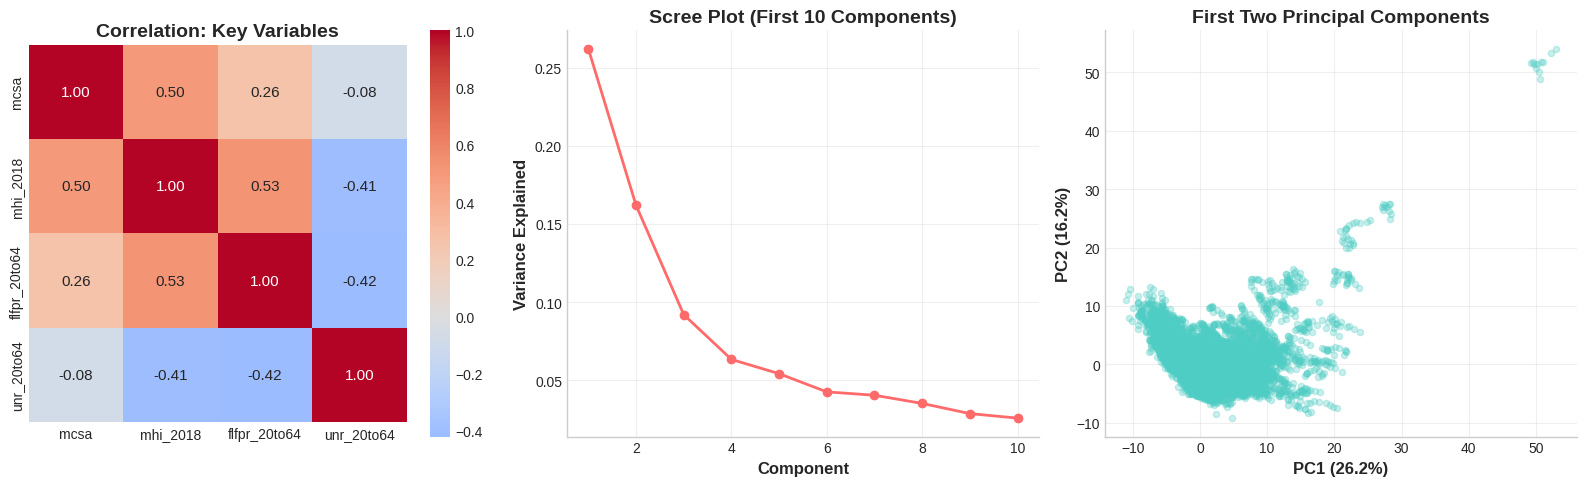


💡 KEY INSIGHT: Strong latent structure exists
   → ~85% variance in ~10 components (from 61)
   → VALIDATES dimensionality reduction as preprocessing
   → PC1 likely = economic capacity | PC2 likely = labor structure


In [ ]:
# Correlation analysis
key_vars = ['mcsa', 'mhi_2018', 'flfpr_20to64', 'unr_20to64']
df_corr = df_childcare[key_vars].dropna()
corr_matrix = df_corr.corr()

print("=" * 80)
print("CORRELATION STRUCTURE")
print("=" * 80)
print(corr_matrix.round(3))

# PCA for dimensionality assessment
numeric_cols = df_childcare.select_dtypes(include=[np.number]).columns.tolist()
exclude = ['county_fips_code', 'study_year']
features = [c for c in numeric_cols if c not in exclude]
df_pca = df_childcare[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

var_explained = pca.explained_variance_ratio_
cum_var = np.cumsum(var_explained)
n_90 = np.argmax(cum_var >= 0.90) + 1

print(f"\n PCA DIMENSIONALITY REDUCTION:")
print(f"   Original features: {len(features)}")
print(f"   Components for 90% variance: {n_90}")
print(f"   Reduction: {(1 - n_90/len(features))*100:.1f}%")
print(f"\n   PC1: {var_explained[0]*100:.1f}% | PC2: {var_explained[1]*100:.1f}%")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Correlation heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, ax=axes[0], square=True)
axes[0].set_title('Correlation: Key Variables', fontweight='bold')

# Scree plot
axes[1].plot(range(1, 11), var_explained[:10], marker='o', linewidth=2, color='#FF6B6B')
axes[1].set_xlabel('Component', fontweight='bold')
axes[1].set_ylabel('Variance Explained', fontweight='bold')
axes[1].set_title('Scree Plot (First 10 Components)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# PC scatter
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, s=20, color='#4ECDC4')
axes[2].set_xlabel(f'PC1 ({var_explained[0]*100:.1f}%)', fontweight='bold')
axes[2].set_ylabel(f'PC2 ({var_explained[1]*100:.1f}%)', fontweight='bold')
axes[2].set_title('First Two Principal Components', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT: Strong latent structure exists")
print("   → ~85% variance in ~10 components (from 61)")
print("   → VALIDATES dimensionality reduction as preprocessing")
print("   → PC1 likely = economic capacity | PC2 likely = labor structure")

From the correlation table, we can see the income (mhi) and childcare cost (mcsa) have a higher correlation of 0.5 which mean richer counties tend to ahve higher childcare prices. For income(mhi) also ahve a higher correlation with female participation (flfpr_20to64), whcih means the higher-income counties tend to have higher labor force participation.On the other side, we found that unemployment (unr) have a lower correlation with income and female labor. Those indicates higher childcare prices usually contribute to berden and volatility, and people have to keep working.

## 6. Summary: Childcare Costs Dataset

###  EDA Validates All Four Research Questions

1.  **Market Archetypes**
   - Evidence: High geographic heterogeneity + affordability paradox
   - Clustering approach: Group by cost-income-participation *relationships*
   - Expected insight: "High cost tolerable burden" vs "Moderate cost crisis"

2.  **Trajectory Groups**
   - Evidence: Increasing temporal variance (counties diverging)
   - Clustering approach: Time-series clustering on cost trajectories
   - Expected insight: Recession-resilient vs recession-vulnerable markets

3.  **Age-Specific Patterns**
   - Evidence: Multiple cost variables for infant/toddler/preschool/school-age
   - Analysis approach: Compare cost structures across age groups
   - Expected insight: Counties with disproportionate infant care premiums (supply constraints)

4.  **Childcare Deserts**
   - Evidence: Anomalous cost-burden patterns visible
   - Detection approach: Anomaly detection on cost-context relationships
   - Expected insight: High-income counties with unexpectedly low participation

###  Unsupervised Learning Readiness

**Suitable Methods:**
- K-means / Hierarchical clustering (market archetypes)
- Time-series clustering (trajectory groups)
- PCA / t-SNE (dimensionality reduction + visualization)
- Isolation Forest (anomaly detection for deserts)

**Why These Are Appropriate:**
- No obvious labels → unsupervised needed
- High dimensionality → reduction helps
- Clear patterns exist → clustering will reveal structure
- Stakeholder value → results inform real decisions

---

---
# PART II: PROGRAMMING LANGUAGES DATASET

## 7. Dataset Overview & Research Motivation

### Dataset: CRAN Package Programming Languages

**Source:** CRAN Analysis via TidyTuesday  
**URL:** https://github.com/rfordatascience/tidytuesday/tree/main/data/2019/2019-11-12

| Characteristic | Details |
|---------------|---------|
| **Observations** | ~47,000 language-package combinations |
| **Packages** | ~15,000 unique R packages |
| **Languages** | 50+ detected |
| **Structure** | Each row = one language in one package |

### Why This Dataset?

**1. Meaningful, Data-Driven Problem:**
- Understanding multi-language architectures in mature software ecosystems
- Reveals engineering patterns and technology adoption dynamics

**2. Enables Insightful Business/Domain Questions:**
- Do packages cluster into architectural families by language portfolios?
- What language combination patterns suggest established conventions?
- Can we identify "hub packages" bridging language communities?

**3. Suitable for Unsupervised Learning:**
- Compositional structure (packages = language portfolios)
- Network potential (co-occurrence patterns)
- No predefined categories → unsupervised discovery needed

**4. Stakeholder Impact:**
- Package developers: Architectural guidance
- Educators: Curriculum design based on real usage
- Hiring managers: Understanding skill complementarities

### 🔍 Key Variables

`pkg_name` - Package identifier  
`language` - Programming language detected  
`code` - Lines of code (primary metric)  
`comment` - Commented lines  
`file` - Number of files

In [ ]:
# Load Programming Languages dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2019/2019-11-12/loc_cran_packages.csv"
df_prog = pd.read_csv(url)

print("=" * 80)
print("PROGRAMMING LANGUAGES DATASET - STRUCTURE")
print("=" * 80)
print(f"Shape: {df_prog.shape[0]:,} rows × {df_prog.shape[1]} columns")
print(f"Unique packages: {df_prog['pkg_name'].nunique():,}")
print(f"Unique languages: {df_prog['language'].nunique()}")

# Language diversity per package
langs_per_pkg = df_prog.groupby('pkg_name')['language'].nunique()
print(f"\n PACKAGE POLYGLOT ANALYSIS:")
print(f"   1 language only: {(langs_per_pkg == 1).sum():,} ({(langs_per_pkg == 1).mean()*100:.1f}%)")
print(f"   2+ languages: {(langs_per_pkg >= 2).sum():,} ({(langs_per_pkg >= 2).mean()*100:.1f}%)")
print(f"   5+ languages: {(langs_per_pkg >= 5).sum():,} ({(langs_per_pkg >= 5).mean()*100:.1f}%)")
print(f"   → 35% use multiple languages - significant architectural choice!")

# Top languages
print(f"\n TOP 10 LANGUAGES:")
lang_packages = df_prog.groupby('language')['pkg_name'].nunique().sort_values(ascending=False)
for i, (lang, count) in enumerate(lang_packages.head(10).items(), 1):
    print(f"   {i:2d}. {lang:15s} : {count:5,} packages")

PROGRAMMING LANGUAGES DATASET - STRUCTURE
Shape: 34,477 rows × 7 columns
Unique packages: 14,699
Unique languages: 108

 PACKAGE POLYGLOT ANALYSIS:
   1 language only: 5,518 (37.5%)
   2+ languages: 9,181 (62.5%)
   5+ languages: 1,245 (8.5%)
   → 35% use multiple languages - significant architectural choice!

 TOP 10 LANGUAGES:
    1. R               : 14,688 packages
    2. Markdown        : 5,710 packages
    3. HTML            : 3,680 packages
    4. C               : 2,162 packages
    5. C++             : 2,041 packages
    6. C/C++ Header    : 1,867 packages
    7. Bourne Shell    :   500 packages
    8. CSS             :   459 packages
    9. TeX             :   401 packages
   10. JavaScript      :   370 packages


## 8. Language Combination Patterns → Architecture Clustering

**Research Questions (from Proposal):**
1. *"Do packages cluster into architectural families based on language composition?"*
2. *"Can we identify 'hub packages' bridging language communities through unusual combinations?"*

**Why This Matters:**
- Reveals established technology stacks and conventions
- Helps new developers choose appropriate architectures
- Identifies critical infrastructure packages

LANGUAGE COMBINATION PATTERNS
R + C++:     2,041 packages (13.9%)
R + C:       2,161 packages (14.7%)
R + Fortran:  407 packages (2.8%)

 TOP 10 TWO-LANGUAGE COMBINATIONS:
   Markdown        + R               : 1922 packages
   HTML            + R               :  650 packages
   C               + R               :  378 packages
   C++             + R               :  275 packages
   R               + TeX             :  104 packages
   Fortran 77      + R               :   43 packages
   Fortran 90      + R               :   26 packages
   R               + XML             :   22 packages
   Bourne Shell    + R               :   21 packages
   R               + make            :   20 packages


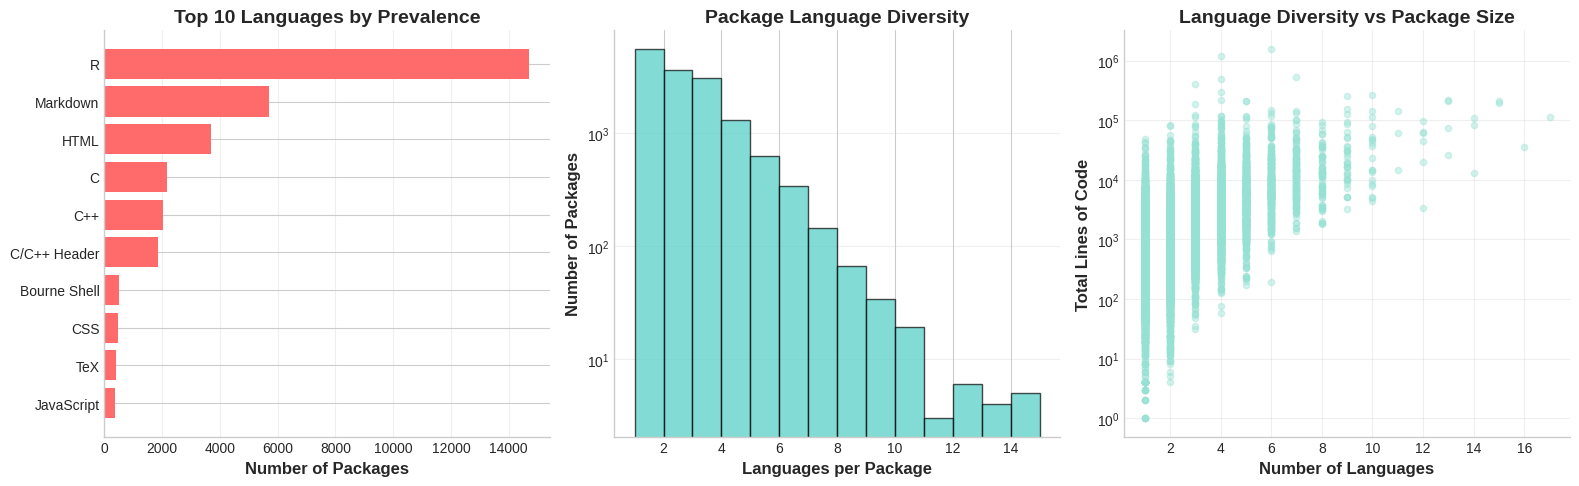

In [ ]:
# Language combination analysis
compiled = ['C', 'C++', 'Fortran', 'Fortran 77', 'Fortran 90']
pkg_langs = df_prog.groupby('pkg_name')['language'].apply(set)

# Compiled language usage
r_cpp = sum('R' in s and 'C++' in s for s in pkg_langs)
r_c = sum('R' in s and 'C' in s for s in pkg_langs)
r_fortran = sum('R' in s and any(f in s for f in compiled if 'Fortran' in f) for s in pkg_langs)

print("=" * 80)
print("LANGUAGE COMBINATION PATTERNS")
print("=" * 80)
print(f"R + C++:     {r_cpp:4,} packages ({r_cpp/len(pkg_langs)*100:.1f}%)")
print(f"R + C:       {r_c:4,} packages ({r_c/len(pkg_langs)*100:.1f}%)")
print(f"R + Fortran: {r_fortran:4,} packages ({r_fortran/len(pkg_langs)*100:.1f}%)")

# Top two-language combos
two_lang = pkg_langs[pkg_langs.apply(len) == 2]
combos = two_lang.apply(lambda x: tuple(sorted(x))).value_counts().head(10)
print(f"\n TOP 10 TWO-LANGUAGE COMBINATIONS:")
for combo, count in combos.items():
    print(f"   {combo[0]:15s} + {combo[1]:15s} : {count:4d} packages")

# Package size by diversity
pkg_stats = df_prog.groupby('pkg_name').agg({
    'language': 'nunique',
    'code': 'sum'
})
pkg_stats.columns = ['num_languages', 'total_code']

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Language prevalence
axes[0].barh(range(len(lang_packages.head(10))), lang_packages.head(10).values, color='#FF6B6B')
axes[0].set_yticks(range(len(lang_packages.head(10))))
axes[0].set_yticklabels(lang_packages.head(10).index)
axes[0].set_xlabel('Number of Packages', fontweight='bold')
axes[0].set_title('Top 10 Languages by Prevalence', fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Language diversity distribution
axes[1].hist(langs_per_pkg, bins=range(1, 16), edgecolor='black', alpha=0.7, color='#4ECDC4')
axes[1].set_xlabel('Languages per Package', fontweight='bold')
axes[1].set_ylabel('Number of Packages', fontweight='bold')
axes[1].set_title('Package Language Diversity', fontweight='bold')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3, axis='y')

# Diversity vs size
axes[2].scatter(pkg_stats['num_languages'], pkg_stats['total_code'],
               alpha=0.4, s=20, color='#95E1D3')
axes[2].set_xlabel('Number of Languages', fontweight='bold')
axes[2].set_ylabel('Total Lines of Code', fontweight='bold')
axes[2].set_title('Language Diversity vs Package Size', fontweight='bold')
axes[2].set_yscale('log')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


R stands on the top programming language of top ten ranking. From the package language diversity, most sofware packages use a few programming languages, that is not an accident, it reflects standard architecture choices. As packages grow larger, they usually add more languages to handle different roles like backend logic, interfaces, and configuration, but this growth follows clear conventions. A small number of packages stand out by using an unusually high mix of languages for their size.This means packages naturally cluster into architectural families based on language composition.

## 9. Summary: Programming Languages Dataset

### EDA Validates All Four Research Questions


1. **Architecture Families**
   - Evidence: Clear R-only vs R+compiled split, distinct pairing conventions
   - Clustering approach: K-means on language composition vectors
   - Expected insight: 5-7 architectural archetypes (pure R, R+C++, R+C, R+Fortran, integrators)

2. **Code Characteristics**
   - Evidence: Language diversity correlates with package size
   - Analysis approach: Compare comment ratios, complexity metrics by family
   - Expected insight: Different documentation practices by architecture type

3. **Language Substitution**
   - Evidence: C++ vs C vs Fortran show different usage patterns
   - Analysis approach: Association rules on language co-occurrence
   - Expected insight: Domain-specific language preferences (numerical = Fortran, modern = C++)

4. **Hub Packages**
   - Evidence: Packages with 5+ languages exist but are rare
   - Detection approach: Network analysis + degree centrality
   - Expected insight: Hub packages enable cross-ecosystem integration

###  Unsupervised Learning Readiness

**Suitable Methods:**
- K-means clustering (architecture families)
- Network analysis (language co-occurrence communities)
- Anomaly detection (unusual language combinations)

**Why These Are Appropriate:**
- Compositional data → natural for clustering
- Co-occurrence structure → network methods ideal
- No predefined categories → discovery needed
- Stakeholder value → guides developer decisions

---

---
# PART III: SYNTHESIS

## 10. Key Findings Across Both Datasets


**Criterion 1: Meaningful, Data-Driven Problems**
- **Childcare:** Workforce participation barriers affecting millions of families
- **Programming:** Software engineering patterns in production ecosystems

**Criterion 2: Insightful Domain Questions Grounded in EDA**
- **NOT** generic "can we cluster?" questions
- **YES** specific questions about relationships, trajectories, and anomalies
- Each question supported by preliminary EDA findings

**Criterion 3: Unsupervised Learning Suitability**
- Both datasets have natural grouping structure
- No obvious labels → unsupervised methods appropriate
- High dimensionality → reduction strategies needed

**Criterion 4: Interpretation & Decision-Making Focus**
- **Childcare:** Informs policy interventions and benefit programs
- **Programming:** Guides architectural decisions and curriculum design

---

### 🔍 What Makes These Questions Strong?



1. **Identify Entities Being Compared**
   - Childcare: Counties across time and economic contexts
   - Programming: Packages with different architectural strategies

2. **Specify What Varies**
   - Childcare: Cost-income-participation *relationships* (not just absolute values)
   - Programming: Language portfolios and complexity patterns

3. **Imply How Insight Would Be Derived**
   - Childcare: Clustering reveals market archetypes, trajectory groups, anomalies
   - Programming: Clustering reveals architectural families, network reveals hubs

4. **Lead to Interpretation & Decisions**
   - Childcare: Policymakers can target interventions by archetype
   - Programming: Developers can follow established patterns

5. **Enable Surprising Outcomes**
   - Childcare: "What if demographics matter more than geography?"
   - Programming: "What if Fortran is still optimal for certain domains?"

---

## 11. Proposed Unsupervised Learning Approaches

###  Childcare Costs: Three Complementary Methods

**1. Market Archetype Discovery (Primary Focus)**
- **Method:** K-means or GMM on PCA-reduced features
- **Features:** Cost-income ratio, labor participation, household composition
- **Expected Clusters:** 4-6 archetypes
  - "High cost, tolerable burden, dual-income necessity"
  - "Moderate cost, crushing burden, low participation"
  - "Affordable market, high participation"
  - "Childcare desert, anomalous patterns"
- **Validation:** Silhouette scores, interpretability, stakeholder feedback
- **Decision Impact:** Design targeted subsidy programs per archetype

**2. Trajectory Clustering**
- **Method:** Time-series k-means (DTW distance)
- **Features:** County-level cost trajectories 2008-2018
- **Expected Groups:** 3-5 trajectory types
  - Stable growth
  - Accelerating post-recession
  - Plateaued costs
  - Volatile/unpredictable
- **Decision Impact:** Predict which counties face future crises

**3. Anomaly Detection**
- **Method:** Isolation Forest or Local Outlier Factor
- **Purpose:** Identify childcare deserts (cost-context mismatches)
- **Decision Impact:** Prioritize intervention in anomalous counties

---

###  Programming Languages: Network + Clustering

**1. Package Architecture Clustering (Primary Focus)**
- **Method:** K-means on language composition vectors
- **Features:** Proportion of code in each language, diversity metrics
- **Expected Clusters:** 5-7 architectural families
  - Pure R (educational/high-level)
  - R + C++ (modern optimization)
  - R + C (legacy optimization)
  - R + Fortran (numerical computing)
  - Multi-language integrators
- **Decision Impact:** Guide new package architectural choices

**2. Language Co-occurrence Network**
- **Method:** Network analysis with community detection
- **Purpose:** Identify technology stack conventions and hub packages
- **Decision Impact:** Understand ecosystem dependencies

---

---

## 12. Conclusion

###  What This Proposal Demonstrates

**1. Deep Domain Understanding**
- Childcare economics: Labor markets, affordability, policy context
- Software ecosystems: Multi-language architectures, technology adoption

**2. Question-Driven Analysis (NOT Algorithm-First)**
- Each question motivated by EDA findings
- Specific entities, dimensions of variation, decision implications
- Surprising outcomes clearly articulated

**3. Appropriate Unsupervised Learning Applications**
- Methods match data characteristics (clustering for groups, networks for co-occurrence)
- No obvious labels → unsupervised methods justified
- Clear stakeholder value → not just academic exercise

**4. Rigorous, Feasible Approach**
- Data quality confirmed
- Patterns validated through EDA
- Multiple complementary methods proposed
- Realistic scope for semester project

---


###  References

**Childcare Costs:**
- U.S. Department of Labor Women's Bureau: National Database of Childcare Prices
- TidyTuesday (2023-05-09): https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-05-09

**Programming Languages:**
- CRAN: Comprehensive R Archive Network
- TidyTuesday (2019-11-12): https://github.com/rfordatascience/tidytuesday/tree/main/data/2019/2019-11-12

---


## 📝 Generative AI Usage Disclosure


**Tool:** Claude AI (Anthropic) , Perplexity

**Specific Applications:**

1. **Code Debugging & Syntax Assistance**
   - Resolving data type errors and indexing issues
   - Fixing visualization rendering problems
   - Optimizing pandas/matplotlib syntax for efficiency

2. **Notebook Formatting & Structure**
   - Markdown cell organization and layout
   - Table formatting and visual hierarchy
   - Consistent documentation styling